---
# Zadaća 4
##### Rok za predaju: 24. ožujka, 2021. u 23:59h
##### Način predaje: Teams->Strojno učenje->Assignment, predajete.ipynb datoteka (ili više datoteki u .zip) ili link na Google colab 

### Ime i prezime: Borna Gajić
---

In [525]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

---
---
## Zadatak 1 (10)

Pokažite ekvivalenciju kriterijskih funkcija $$J_1(\theta)=\frac{1}{m}\sum\limits_{i=1}^{m}\log(1+e^{-y^{(i)}\theta^Tx^{(i)}}), \; gdje\; je \; y^{(i)}\in\{-1,1\}$$ i 
$$J_2(\theta) = -\frac{1}{m}\sum\limits_{i=1}^{m}(y^{(i)}\log{(h_{\theta}(x^{(i)})+(1-y^{(i)})\log{(1-h_{\theta}(x^{(i)}))})}, \; gdje\; je\; y^{(i)}\in \{0,1\}.$$



Neka je $J_1(\theta)=\frac{1}{m}\sum\limits_{i=1}^{m}\log(1+e^{-\theta^Tx^{(i)}}), \; kada \; je \; y^{(i)} = -1$, te  
$J_1(\theta)=\frac{1}{m}\sum\limits_{i=1}^{m}\log(1+e^{\theta^Tx^{(i)}}), \; kada \; je \; y^{(i)} = 1$

Pokažimo ekvivalenciju $J_2(\theta) = J_1(\theta)$  
Ako je $y^{(i)} = 0$ tada:  
$J_2(\theta) = -\dfrac{1}{m}\cdot \displaystyle\sum_{i = 1}^{m}log\left(1 - \dfrac{1}{1 + e^{-\theta^T\cdot x^{(i)}}} \right) = \dfrac{1}{m}\cdot \displaystyle\sum_{i = 1}^{m}log\left(\dfrac{e^{\theta^T \cdot x^{(i)}}}{1 + e^{-\theta^T\cdot x^{(i)}}} \right)^{-1} = \dfrac{1}{m}\cdot \displaystyle\sum_{i = 1}^{m}log\left(1 + e^{\theta^T \cdot x^{(i)}} \right)^{-1} = J_1(\theta)$, kada je za $J_1: y^{(i)} = -1$  
Za $y^{(i)} = 1$:  
$J_2(\theta) = -\dfrac{1}{m}\cdot \displaystyle\sum_{i = 1}^{m}log\left(\dfrac{1}{1 + e^{-\theta^T\cdot x^{(i)}}} \right) = \dfrac{1}{m}\cdot \displaystyle\sum_{i = 1}^{m}log\left(\dfrac{1}{1 + e^{-\theta^T\cdot x^{(i)}}} \right)^{-1} = \dfrac{1}{m}\cdot \displaystyle\sum_{i = 1}^{m}log\left(1 + e^{-\theta^T \cdot x^{(i)}} \right)^{-1} = J_1(\theta)$, kada je za $J_1: y^{(i)} = 1$

---
---
## Zadatak 2 (20)

Neka su zadani podaci $X\in \mathbb{R}^{m\times n}$ i pripadne izlazne vrijednosti $y \in \mathbb{R}^{m\times k}$ koje označavaju pripadnost nekog podatka jednoj od klasa $0, 1, \cdots, k$. Na ovim podacima možemo provesti proces učenja klasifikacijskog modela. Jedan od takvh modela je logistička regresija. <br>
Logistička regresija kao model funkciju koristi $h_{\theta}(x) = \frac{1}{1+e^{-\theta ^T x}}$, gdje su $\theta$ parametri koje model uči. <br>
Znamo kako se učenje svodi na minimizaciju funkcije $J(\theta) = \frac{1}{m}\sum\limits_{i=1}^m [-y^{(i)}\log{(h_{\theta}(x^{(i)}))} - (1-y^{(i)})\log{(1-h_{\theta}(x^{(i)}))}]$ te kako do rješenje tog minimizacijskog problema možemo doći gradijentnom metodom.


1. Implementirajte gradijentnu metodu za slučaj binarne klasifikacije ($k=2$). Neka vaša funkcija koja pokreće gradijentnu metodu kao argumente prima stopu učenja $\alpha$ i broj iteracija metode.
2. Isprobajte vašu implementaciju na danom skupu podataka ..

---
U datoteci *heart_data.csv* nalaze se podaci o pacijentima vezani uz zdravlje njihovog krvožilnog sustava i srca. Svakom pacijentu su navedene godine, spol i podaci koji dolaze iz mjerenja poput razine kolesterola, maksimalni otkucaj srca i slično. Osim toga svakom je pacijentu pridružena oznaka $0$ ako ne boluje od srčanih bolesti tj. zdrav je i $1$ ako ima srčanu bolest. <br>
- Istražite i pripremite ih za učenje modela. (Učitajte, skalirajte, vizualizirajte ) 
- Postavite model logističke regresije koristeći implementaciju iz prethodnog zadatka. 
- Model je potrebno učiti na $70\%$ podataka, a zatim ga testirati na preostalih $30\%$ podataka. 
- Kako biste ocijenili model koristite metrike koje smo upoznali na vježbama.


In [49]:
# 2.2.
test_x = np.array([[-30,8],[3,-37],[-17,18],[-22, 9],[-1,-25],[21,3],[8,-10],[0,-12],[-0,-18],[-2,15],[-3,-23],[3,-16],[27,-24],[-16,15],[-13,-13],[-3,6],[23,10],[ 12,17],[3,4],[-8,22]])
test_y = np.array([0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0]).reshape(-1, 1)

In [50]:
def gradient_method (X, Y, alpha, numIter): 
    m, n = X.shape
    theta = np.zeros((n, 1))
    
    for i in range(numIter):
        B = -X * (Y - 1)
        N = X / (np.exp((theta.T * X).sum(axis = 1)) + 1).reshape(-1, 1)

        gradJ = (B - N).sum(axis = 0).reshape(-1, 1)
        theta = theta - alpha * gradJ 
        
    return theta

Treniranje modela:

In [51]:
my_theta = gradient_method(test_x, test_y, 0.001, 1000)

print("Hiperparametri theta: ", my_theta.ravel())

Hiperparametri theta:  [ 0.12974827 -0.13677245]


Grafički prikaz:

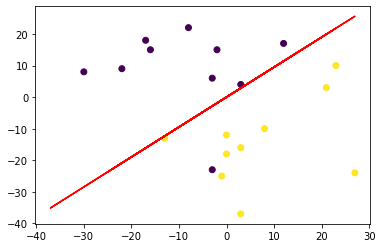

In [52]:
plt.scatter(test_x[:, 0], test_x[:, 1], c = test_y)
plt.plot(test_x, -my_theta[0]/my_theta[1] * test_x, c = 'r')
plt.show()

Obrada _heart_data_ podataka 

In [53]:
heart_data = pd.read_csv('./Podaci/heart_data.csv')

heart_data

,Age,Sex,Chest_Pain,Resting_Blood_Pressure,Colestrol,Fasting_Blood_Sugar,Rest_ECG,MAX_Heart_Rate,Exercised_Induced_Angina,ST_Depression,Slope,Major_Vessels,Thalessemia,Target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
293,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
294,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
295,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


Djeljenje podataka na skup za treniranje i učenje

In [54]:
X_heart = preprocessing.scale(heart_data.to_numpy()[:, : -1])
y_heart = heart_data.to_numpy()[:, -1].reshape(-1, 1)

X_heart_train, X_heart_test, y_heart_train, y_heart_test = train_test_split(X_heart, y_heart, test_size = 0.3, random_state = 42)

Grafički prikaz podskupa podataka

In [55]:
heart_theta = gradient_method(X_heart_train, y_heart_train, 0.001, 1000)

In [56]:
print("Hiperparametri dobiveni gradientnom metodom koja rješava model logističke regresije: \n", heart_theta)

Hiperparametri dobiveni gradientnom metodom koja rješava model logističke regresije: 
 [[-0.23689148]
 [ 0.68279262]
 [ 0.31981872]
 [ 0.50651964]
 [ 0.41581793]
 [-0.43145289]
 [ 0.12772088]
 [-0.55274743]
 [ 0.34969788]
 [ 0.33565225]
 [ 0.21092235]
 [ 1.30497646]
 [ 0.58256856]]


Ocjena modela:

In [57]:
def my_prediction (X, theta):
    return np.sign((theta.T * X).sum(axis = 1))

In [58]:
y_pred = my_prediction(X_heart_test, heart_theta)

print("Prediction: \n", y_pred)

Prediction: 
 [-1. -1. -1.  1. -1. -1. -1.  1.  1. -1.  1. -1. -1. -1. -1. -1. -1. -1.
  1. -1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1. -1.
  1. -1.  1.  1. -1.  1.  1.  1. -1.  1. -1.  1.  1. -1. -1.  1. -1. -1.
  1.  1. -1. -1.  1.  1. -1. -1. -1. -1. -1.  1.  1. -1.  1.  1.  1.  1.
  1. -1.  1. -1. -1. -1. -1. -1. -1.  1.  1.  1.  1. -1. -1.  1. -1.  1.]


In [59]:
print("Accuracy_score: ", accuracy_score(y_heart_test, y_pred))

Accuracy_score:  0.4



---
## Zadatak 3 (10)
Na predavanju je predstavljena softmax regresija i dana je kriterijska funkcija $$
J(\theta) = - \sum\limits_{i=1}^{m} \sum\limits_{j=1}^{k} I^{j}(y^{(i)})\log{\frac{e^{\theta^{(j)^T}x^{(i)}}}{\sum\limits_{l=1}^{k}e^{\theta^{(l)^{T}}x^{(i)}}}}
$$
Raspišite gradijent funkcije $J(\theta)$. 
---

Neka je $y \in \{1, 2, \dots, k\}, k \in \mathbb{N}$ gdje je $k$ broj kategorija; $x \in \mathbb{R}^n$ podatak s $n$ featura.  
Definiramo model funkciju:  
$h_\theta(x) = \dfrac{1}{\displaystyle\sum_{j=1}^{k} e^{\theta^{(j)^T}\cdot x}} \begin{bmatrix} e^{\theta^{(0)^T}\cdot x} &  e^{\theta^{(1)^T}\cdot x} & \cdots & e^{\theta^{(k)^T}\cdot x} \end{bmatrix}^T$  
Pri čemu je $\theta$ definirana kao matrica  
$
    \begin{bmatrix}
        | & | & | & |\\[0.3em]
        \theta^{(1)} & \theta^{(2)} & \cdots & \theta^{(k)} \\[0.3em]
        | & | & | & |
    \end{bmatrix}
$  
I kriterijsku funkciju  
$J(\theta) = - \sum\limits_{i=1}^{m} \sum\limits_{j=1}^{k} I^{j}(y^{(i)})\log{\dfrac{e^{\theta^{(j)^T}x^{(i)}}}{\sum\limits_{l=1}^{k}e^{\theta^{(l)^{T}}x^{(i)}}}}$  
Gradijent kriterijske funkcije definiran je s  
$\nabla_{\theta^{(k)}}J(\theta) = - \displaystyle\sum_{i = 1}^{m}\left[x^{(i)}\left(1\{y^{(i)} = k\} - P\left(y^{(i)} = k | x^{(i)};\theta \right) \right) \right]$  
Pri čemu je dana parcijalna derivacija po $k$-tom parametru $\theta^{(k)}$  
$P\left(y^{(i)} = k | x^{(i)};\theta \right) = \dfrac{e^{\theta^{(k)}\cdot x^{(i)}}}{\displaystyle\sum_{j=1}^{k} e^{\theta^{(j)^T}\cdot x}}$   
Vjerojatnost da je $i$-ti $y$ u $k$-toj kategoriji.

---
## Zadatak 4 (20)


#### a)
Neka su zadani podaci $X\in \mathbb{R}^{m\times n}$ i pripadne izlazne vrijednosti $y\in \mathbb{R}^{m\times k}$ koje označavaju pripadnost nekog podatka jednoj od klasa $0, 1, \cdots, k$. Na ovim podacima možemo provesti proces učenja klasifikacijskog modela.<br>
Budući da se radi o višeklasnoj klasifikaciji, koristit ćemo *softmax* funkciju.<br> 
Kao i do sada, učenje se svodi na minimizaciju funkcije 
$$
J(\theta) = - \sum\limits_{i=1}^{m} \sum\limits_{j=1}^{k} I^{j}(y^{(i)})\log{\frac{e^{\theta^{(j)^T}x^{(i)}}}{\sum\limits_{l=1}^{k}e^{\theta^{(l)^{T}}x^{(i)}}}}
$$
te kako do rješenja tog minimizacijskog problema možemo doći gradijentnom metodom. <br>

1. Implementirajte gradijentnu metodu za općeniti slučaj klasifikacije. Neka vaša funkcija koja pokreće gradijentnu metodu kao argumente prima stopu učenja $\alpha$ i broj iteracija metode.
2. Isprobajte implementiranu funkciju na podacima $data\_examples.csv$. Odaberite proizvoljno stopu učenja $\alpha$ i broj iteracija. 
3. Nacrtajte graf promjene vrijednosti funkcije troška kroz iteracije i ispišite vrijednost funkcije troška u zadnjoj iteraciji. 

---
#### b)
Zadani su vam podaci koji se nalaze u direktoriju *Mobiteli* <br>

Ovaj skup sadrži podatke o mobitelima - njihove karakteristike i cjenovne rangove. Svaki uzorak (mobitel) je opisan kroz $20$ različitih varijabli. Varijable su kategoričke poput $dual\_sim$ koja poprima vrijednosti $0$ i $1$ ili numeričke poput $clock\_speed$. $18$ varijabli je tipa **int**,a $2$ su tipa **float**. <br>

Svaki mobitel je klasificiran u jedan cjenovni razred koji može biti $1$, $2$ ili $3$. <br>


Potrebno je upoznati se sa skupom podataka, analizirati ga koristeći neke kvantitativne ili grafičke tehnike.<br> 
Glavni zadatak je vidjeti može li se na temelju različitih karakteristika mobitel odrediti njegov cjenovni razred. <br>


Koristeći *softmax* implementaciju iz a) podzadatka riješite ovaj problem tako da ćete 
1. Podatke istražiti i pripremiti ih za učenje modela. (Učitajte, skalirajte, vizualizirajte ) 
1. Model učiti na train.csv
2. Model testirati na test.csv i ispisati matricu zabune, točnost (accuracy)

**a)**

In [518]:
def predict (prob_matrix):
    max_prob = np.amax(prob_matrix, axis = 0)
    b_max_prob = (prob_matrix == max_prob)
    arg = np.hstack([np.arange(prob_matrix.shape[0]).reshape(-1, 1)] * prob_matrix.shape[1])
    
    return np.extract(b_max_prob.T, arg.T)
    

def model_function (X, theta):
    result = []
    for i in range(X.shape[0]):
        subresult = []
        for k in range(theta.shape[1]):
            subresult.append(np.exp((theta[:, k] * X[i]).sum()))
        N = 0
        for j in range(theta.shape[1]):
            N += np.exp((theta[:, j] * X[i]).sum())
            
        subresult = list(map(lambda x: x * (1/N), subresult))
        result.append(subresult)
    return result

def cost_function (X, Y, theta):
    n_classes = theta.shape[1]
    result = 0
    
    for k in range(n_classes):
        B = np.exp((theta[:, k] * X).sum(axis = 1)).reshape(-1, 1)
        N = 0
        for j in range(n_classes):
                N += np.exp((theta[:, j] * X).sum(axis = 1)).reshape(-1, 1)
        P = np.log(B / N)
        result += (kronecker(Y, k) * P).sum(axis = 0)
        
    return result
    
def gradient_method_k_classes (X, Y, alpha, numIter, draw = False): 
    m, n = X.shape
    num_of_classes = np.intc(np.amax(y) - np.amin(y)) + 1
    theta = np.zeros((n, num_of_classes))
    cost_result = [cost_function(X, Y, theta)]
    
    for i in range(numIter):
        for k in range(num_of_classes):
            B = np.exp((theta[:, k] * X).sum(axis = 1)).reshape(-1, 1)
            N = 0
            for j in range(num_of_classes):
                N += np.exp((theta[:, j] * X).sum(axis = 1)).reshape(-1, 1)
            P = (B / N)

            gradJ = -(X * (kronecker(Y, k) - P)).sum(axis = 0)
            theta[:, k] = theta[:, k] - alpha * gradJ
        
        cost_result.append(cost_function(X, Y, theta))
    
    print("Zadnja vrijednost funkcije troška: {}".format(cost_result[-1]))
    if draw == True:
        N = np.arange(1, numIter + 2)
        plt.plot(N, cost_result)
        plt.ylabel("Rezultat Loss funkcije")
        plt.xlabel("Iteracija")
        
        plt.show()
    
    return theta

In [62]:
data_examples = pd.read_csv('./Podaci/data_example.csv')
data_examples

,x1,x2,y
0,7.618086,8.475016,0.0
1,8.952893,-6.187045,1.0
2,8.988282,-6.168347,1.0
3,-9.360517,-0.279375,2.0
4,9.310616,-5.363294,1.0
...,...,...,...
95,10.018592,-3.881992,3.0
96,8.301698,7.328327,0.0
97,8.395614,-3.903126,3.0
98,9.334748,-6.866427,1.0


In [139]:
X = preprocessing.scale(data_examples.to_numpy()[:, : -1])
y = data_examples.to_numpy()[:, -1].reshape(-1, 1)

In [345]:
def kronecker (y, k):
    a = np.array([k for i in range(len(y))]).reshape(-1, 1)
    return np.where(a == y, 1, 0)

Zadnja vrijednost funkcije troška: [-36.78490213]


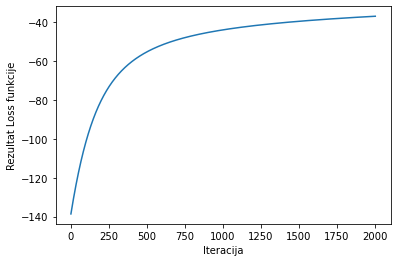

In [370]:
theta_k_class = gradient_method_k_classes(X, y, 0.0001, 2000, True)

In [319]:
print("Dobiveni hiperparametri za 4 klase: \n", theta_k_class)

Dobiveni hiperparametri za 4 klase: 
 [[ 0.44817313  0.52361245 -1.95389015  0.98296394]
 [ 1.95144748 -1.57475106  0.14196422 -0.51776466]]


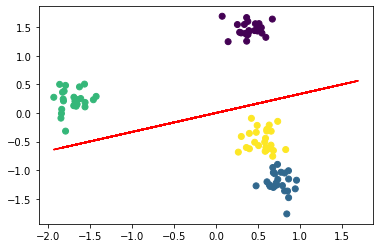

In [316]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.plot(X, -theta_k_class[0, 1]/theta_k_class[1, 1] * X, c = 'r')
plt.show()

**b)**

In [349]:
mobiteli_train_data = pd.read_csv('./Podaci/Mobiteli/train.csv')

mobiteli_train = mobiteli_train_data.to_numpy()
mobiteli_test = pd.read_csv('./Podaci/Mobiteli/test.csv').to_numpy()

X_mob = preprocessing.scale(mobiteli_train[:, : -1])
y_mob = mobiteli_train[:, -1].reshape(-1, 1)

Svakom mobitelu se može pridružiti cijenovni razred: 0, 1, 2 ili 3

In [287]:
mobiteli_train_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


Grafički prikaz s dva featura, visina mobitela i količina RAM-a

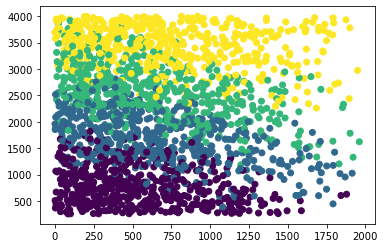

In [309]:
plt.scatter(mobiteli_train_data['px_height'], mobiteli_train_data['ram'], c = y_mob)
plt.show()

1) pokušaj treniranja modela sa svim featurima

Zadnja vrijednost funkcije troška: [-1287.11046144]


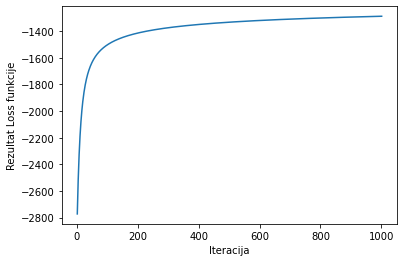

In [372]:
mobiteli_theta = gradient_method_k_classes(X_mob, y_mob, 0.0001, 1000, True)

In [376]:
print("Dobiveni hiperparametri za model koji je treniran nad svim featurima: \n", mobiteli_theta)

Dobiveni hiperparametri za model koji je treniran nad svim featurima: 
 [[-9.59215488e-01 -6.36389009e-01  5.78773659e-01  1.00476575e+00]
 [-1.10010002e-02 -2.94832968e-03 -1.55666798e-02  2.77797708e-02]
 [ 4.78485631e-02 -3.80136482e-02  3.49099754e-03 -1.35004983e-02]
 [ 4.27593221e-02  3.74510057e-02 -8.09050060e-02 -1.75429384e-03]
 [-4.11598343e-02 -9.36633271e-03  6.86914332e-02 -1.92996668e-02]
 [ 2.73329043e-02  6.18511176e-02 -1.24942390e-01  3.45530208e-02]
 [-3.98181321e-02 -5.83451517e-04 -5.52338076e-02  9.20296419e-02]
 [ 1.05364925e-02  1.38282232e-01 -1.03016536e-01 -4.52454693e-02]
 [ 9.46869529e-02  6.78525720e-02  4.07889893e-02 -1.99199867e-01]
 [ 6.13102318e-03 -1.56817729e-01  1.24925754e-01  2.37096108e-02]
 [-1.53161310e-02 -1.50757617e-02 -1.73763004e-02  4.56227987e-02]
 [-5.86733157e-01 -2.74637356e-01  3.35968025e-01  5.15175088e-01]
 [-5.52502625e-01 -3.93032854e-01  3.11088322e-01  6.22412464e-01]
 [-3.68177053e+00 -2.67201488e+00  2.65289744e+00  3.6452

Podaci za testiranje

In [383]:
X_mob_test = preprocessing.scale(mobiteli_test[:, :-1])
y_mob_test = mobiteli_test[:, -1].reshape(-1, 1)

In [452]:
test_result = np.array(model_function(X_mob_test, mobiteli_theta)).T

print("Matrica vjerojatnosti gdje redci predstavljaju vjerojatnost da podatak iz stupca spada u tu kategoriju \n", test_result)
print('-----------------------------')
print("Npr. vjerojatnosti od prvog mobitela: ", test_result[:, 0])

Matrica vjerojatnosti gdje redci predstavljaju vjerojatnost da podatak iz stupca spada u tu kategoriju 
 [[6.69158116e-04 7.96277195e-05 3.21732252e-03 ... 6.84729556e-01
  1.54152208e-01 2.91737673e-02]
 [1.06458793e-03 3.52016166e-04 9.99309517e-03 ... 3.13694248e-01
  1.48591913e-01 2.88199655e-02]
 [3.92901712e-01 2.99030636e-01 2.39826175e-01 ... 1.19912112e-03
  2.59331265e-01 4.78944485e-01]
 [6.05364542e-01 7.00537721e-01 7.46963407e-01 ... 3.77074587e-04
  4.37924615e-01 4.63061782e-01]]
-----------------------------
Npr. vjerojatnosti od prvog mobitela:  [0.00066916 0.00106459 0.39290171 0.60536454]


In [522]:
y_mob_test_pred = predict(test_result).reshape(-1, 1)
y_mob_test_pred

array([[3],
       [3],
       [3],
       [3],
       [0],
       [3],
       [3],
       [1],
       [3],
       [0],
       [3],
       [3],
       [0],
       [0],
       [3],
       [0],
       [3],
       [0],
       [3],
       [2],
       [0],
       [3],
       [1],
       [0],
       [3],
       [0],
       [3],
       [0],
       [2],
       [0],
       [3],
       [0],
       [3],
       [0],
       [0],
       [0],
       [3],
       [0],
       [3],
       [0],
       [1],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [3],
       [0],
       [2],
       [0],
       [0],
       [3],
       [0],
       [3],
       [0],
       [3],
       [0],
       [0],
       [3],
       [3],
       [3],
       [0],
       [1],
       [0],
       [0],
       [3],
       [3],
       [0],
       [3],
       [0],
       [3],
       [3],
       [3],
       [3],
       [0],
       [3],
       [0],
       [1],
       [3],
       [0],
       [3],
       [3],
    

In [530]:
tn, fp, fn, tp = confusion_matrix(y_mob_test, y_mob_test_pred)
print('Confusion matrix = \n',tp, fp,'\n', fn, tn)

Confusion matrix = 
 [  0   0   1 259] [189  35   3  11] 
 [  1   3  52 186] [260   0   0   0]


**Preciznost**

In [532]:
print("Preciznost modela: ", accuracy_score(y_mob_test, y_mob_test_pred))
print("Preciznost preko matrice konfuzije: ", (tp[0] + tn[0]) / (tp[0] + tn[0] + fp[0] + fn[0]))

Preciznost modela:  0.606
Preciznost preko matrice konfuzije:  0.5777777777777777


Prvi pokušaj je zadovoljavajući!